### Follows the script plotENSOcmipIndices.jl to produce time series panels for the ENSO-RI GRL paper

#### for more detailed commenting see the plotENSOcmipIndices.jl script

In [1]:
using DataFrames
using CSV 
using CairoMakie
using Statistics 
using NCDatasets
include("ensoFuncs.jl")

test_num_nina (generic function with 1 method)

In [2]:
path="/Users/C823281551/"

# files with data from ssp585 are labelled with a b.   e.g.  file1b, file2b, file5b, file6b, and file9b
# CNRM
file1  = path*"data/tos_CNRM_hist/tos_Omon_CNRM-ESM2-1_historical_r1i1p1f2_gn_18500116-20141216.nc"
file1b = path*"data/cmip6/CNRMESM2/tos_Omon_CNRM-ESM2-1_ssp585_r1i1p1f2_gn_20150116-21001216NewRegrid.nc"
# MPI-ESM
file2  = path*"data/MPI-ESM1/tos_Omon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_18500116-20141216_regridded.nc"
file2b = path*"data/MPI-ESM1/tos_Omon_MPI-ESM1-2-LR_ssp585_r1i1p1f1_gn_20150116-21001216_latlon.nc"
# GFDL
  # did GFDL not participate in the ssp simulations? 
file3  = path*"data/tos_GFDL_hist/tos_Omon_GFDL-ESM4_historical_r1i1p1f1_gr_18500116-20141216.nc"
# E3SM
file4  = path*"data/E3SM/tos_Omon_E3SM-1-1-ECA_historical_r1i1p1f1_gr_18500116-20141216.nc"
file4b  = path*"data/"
# CESM2
file5b = path*"data/CESM2/tos_Omon_CESM2_ssp585_r4i1p1f1_gn_20150115-21001215full_regrid.nc"
# HadGEM3 (MB Andrews et al., 2020, JAMES?)
  # LL files have a nominal atmospheric resolution of 135km and an ocean resolution of 1 degrees.
  # MM files have a nominal atmospheric resolution of 60 km and an ocean resolution of 0.25 degrees.
file6  = path*"data/cmip6/HadGEM3/tos_Omon_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_18500116-20141216_regridded.nc"
file6b = path*"data/cmip6/HadGEM3/tos_Omon_HadGEM3-GC31-LL_ssp585_r1i1p1f3_gn_20150116-21001216_regridFull.nc"
# ACCESS
file9b = path*"data/ACCESS-CM2/tos_Omon_ACCESS-CM2_ssp585_r1i1p1f1_gn_20150116-21001216_regridded.nc"
#FGOALS
file10b = path*"data/cmip6/FGOALS/tos_Omon_FGOALS-g3_ssp585_r1i1p1f1_gn_20150116-21001216_regrid.nc"

"/Users/C823281551/data/cmip6/FGOALS/tos_Omon_FGOALS-g3_ssp585_r1i1p1f1_gn_20150116-21001216_regrid.nc"

## data from Observations

In [3]:
# incoming data in csv format:
file7 = path*"data/obs/observed_nino3.4.csv"
file8 = path*"data/obs/observed_tropicalmean.csv"
df1 = CSV.read(file7, header = 0, footerskip = 0, DataFrame)
df2 = CSV.read(file8, header = 0, footerskip = 0, DataFrame)
nms = ["year", "jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
dfa  = DataFrame(df1, nms)
dfb  = DataFrame(df2, nms)
istart = 2
iend   = 170 # years
# this is necessary because of the weird structure of dataframes (1 year per row)
for i in istart:iend
    if i < istart + 1
        global a1 = collect(df1[istart-1, 2:13]) # observed nino3.4
        global a2 = collect(df2[istart-1, 2:13]) # observed tr mn
    end
    b1 = collect(df1[i, 2:13]) # grab a row of the DataFrame and convert to vector
    b2 = collect(df2[i, 2:13]) # grab a row of the DataFrame and convert to vector
    global c1 = [a1; b1] # concatinate two vectors of observed nino3.4
    global c2 = [a2; b2] # concatinate two vectors of observed tropical mean
    a1 = c1
    a2 = c2
end

#### Compute both the Oceanic Nino Index (ONI) and the Relative ONI (RONI) from nino3.4

In [4]:
enso3p4_mn = mean(c1)
nino3p4_anom = c1 .- enso3p4_mn
tp_mn = mean(c2)
tp_anom = c2 .- tp_mn

# remove seasonal cycle
mn_oni = zeros(12)
mn_a = [mean(df1[:,i]) for i in 2:13] # seasonal cycle of nino3.4
mn_b = [mean(df2[:,i]) for i in 2:13] # seasonal cycle of tropical mean
# one can check the seasonal cycle in the REPL with:
# lines(mn_a)
jend = 170*12

c1nsc  = zeros(jend)
c2nsc  = zeros(jend)
roni_a  = zeros(jend)

for i in 1:12:jend
  # remove seasonal cycle of nino3p4
  c1nsc[i]=nino3p4_anom[i]-mn_a[1]
  c1nsc[i+1]=nino3p4_anom[i+1]-mn_a[2]
  c1nsc[i+2]=nino3p4_anom[i+2]-mn_a[3]
  c1nsc[i+3]=nino3p4_anom[i+3]-mn_a[4]
  c1nsc[i+4]=nino3p4_anom[i+4]-mn_a[5]
  c1nsc[i+5]=nino3p4_anom[i+5]-mn_a[6]
  c1nsc[i+6]=nino3p4_anom[i+6]-mn_a[7]
  c1nsc[i+7]=nino3p4_anom[i+7]-mn_a[8]
  c1nsc[i+8]=nino3p4_anom[i+8]-mn_a[9]
  c1nsc[i+9]=nino3p4_anom[i+9]-mn_a[10]
  c1nsc[i+10]=nino3p4_anom[i+10]-mn_a[11]
  c1nsc[i+11]=nino3p4_anom[i+11]-mn_a[12]
  # remove seasonal cycle of tropical mean 
  c2nsc[i]  =tp_anom[i]-mn_b[1]
  c2nsc[i+1]=tp_anom[i+1]-mn_b[2]
  c2nsc[i+2]=tp_anom[i+2]-mn_b[3]
  c2nsc[i+3]=tp_anom[i+3]-mn_b[4]
  c2nsc[i+4]=tp_anom[i+4]-mn_b[5]
  c2nsc[i+5]=tp_anom[i+5]-mn_b[6]
  c2nsc[i+6]=tp_anom[i+6]-mn_b[7]
  c2nsc[i+7]=tp_anom[i+7]-mn_b[8]
  c2nsc[i+8]=tp_anom[i+8]-mn_b[9]
  c2nsc[i+9]=tp_anom[i+9]-mn_b[10]
  c2nsc[i+10]=tp_anom[i+10]-mn_b[11]
  c2nsc[i+11]=tp_anom[i+11]-mn_b[12]
end

sig_oni   = std(c1nsc)   # standard deviation of oni
sig_dif   = std(c1nsc-c2nsc) # standard deviation of tr mean
sig_scale = sig_oni/sig_dif

# calculate a 3 point running mean
ts_oni = zeros(2040)
tmn_sm = zeros(2040)
istart= 2
jend  = 2040
for i in istart:jend-1
  ts_oni[i] = (c1nsc[i+1]+c1nsc[i]+c1nsc[i-1])/3
  tmn_sm[i] = (c2nsc[i+1]+c2nsc[i]+c2nsc[i-1])/3
end
ts_oni[1]    =ts_oni[2]
ts_oni[jend] =ts_oni[jend-1]
tmn_sm[1]    =tmn_sm[2]
tmn_sm[jend] =tmn_sm[jend-1]

roni_a = sig_scale.*(ts_oni - tmn_sm)

2040-element Vector{Float64}:
 -0.10127756943454777
 -0.10127756943454777
  0.07200924536292569
  0.26448449101808247
  0.2619930246765422
  0.2566024396897707
 -0.0021007466297659864
 -0.04673711068989612
 -0.48216636364833104
 -0.6648980841962401
 -1.0237155959193223
 -0.7456566434555327
 -0.1629025318338684
  ⋮
 -0.744739364709829
 -0.5166095638199566
 -0.27766752442866627
 -0.058742507671638966
  0.23253703155305594
  0.5320080861377118
  0.8348248206059995
  1.0814598134145614
  1.3487058923283806
  1.6022251531064162
  1.7075243077743605
  1.7075243077743605

In [5]:
2023 - 1854

169

## data from CMIP Models

In [6]:
timelen = 1980
inpFile = file1
println("~~~~~~~~~~~~~~~~~~file 1~~~~~~~~~~~~~~~~~~~~~~")
println(inpFile)
println("""~~~~~~~~~~~~~~~~~~>>>>>>~~~~~~~~~~~~~~~~~~~~~~""")
lat1 = 1
lat2 = 40
lon34a = 10
lon34b = 61
lat34a = 15
lat34b = 25

prepare_cmip_ts(inpFile,timelen,lat1,lat2,lon34a,lon34b,lat34a,lat34b);
ba1 = ts_rmn;
ba1nn = ts_rmn2;
###
inpFile = file2
println("~~~~~~~~~~~~~~~~~~file 2~~~~~~~~~~~~~~~~~~~~~~")
println(inpFile)
println("""~~~~~~~~~~~~~~~~~~>>>>>>~~~~~~~~~~~~~~~~~~~~~~""")
prepare_cmip_ts(inpFile,timelen,lat1,lat2,lon34a,lon34b,lat34a,lat34b);
ba2 = ts_rmn;
ba2nn = ts_rmn2;
##
inpFile = file3
println("~~~~~~~~~~~~~~~~~~file 3~~~~~~~~~~~~~~~~~~~~~~")
println(inpFile)
println("""~~~~~~~~~~~~~~~~~~>>>>>>~~~~~~~~~~~~~~~~~~~~~~""")
prepare_cmip_ts(inpFile,timelen,lat1,lat2,lon34a,lon34b,lat34a,lat34b);
ba3 = ts_rmn;
ba3nn = ts_rmn2;
#
inpFile = file4
println("~~~~~~~~~~~~~~~~~~file 4~~~~~~~~~~~~~~~~~~~~~~")
println(inpFile)
println("""~~~~~~~~~~~~~~~~~~>>>>>>~~~~~~~~~~~~~~~~~~~~~~""")
prepare_cmip_ts(inpFile,timelen,lat1,lat2,lon34a,lon34b,lat34a,lat34b);
ba4 = ts_rmn
#
inpFile = file6
println("~~~~~~~~~~~~~~~~~~file 6~~~~~~~~~~~~~~~~~~~~~~")
println(inpFile)
println("""~~~~~~~~~~~~~~~~~~>>>>>>~~~~~~~~~~~~~~~~~~~~~~""")
prepare_cmip_ts(inpFile,timelen,lat1,lat2,lon34a,lon34b,lat34a,lat34b);
ba6 = ts_rmn
#
##CNRM scenario timeseries...
timelen2=1032
inpFile = file1b # CNRM-ESM2
lat1 = 1
lat2 = 40
println("~~~~~~~~~~~~~~~~~~file 1b~~~~~~~~~~~~~~~~~~~~~~")
println(inpFile)
println("""~~~~~~~~~~~~~~~~~~>>>>>>~~~~~~~~~~~~~~~~~~~~~~""")
lat1   = 71
lat2   = 110
lat34a = 85
lat34b = 96
lon34a = 10
lon34b = 61
prepare_cmip_ts(inpFile,timelen2,lat1,lat2,lon34a,lon34b,lat34a,lat34b);
ba1b = ts_rmn
##MPI scenario timeseries...
inpFile = file2b
println("~~~~~~~~~~~~~~~~~~file 2b~~~~~~~~~~~~~~~~~~~~~~")
println(inpFile)
println("""~~~~~~~~~~~~~~~~~~>>>>>>~~~~~~~~~~~~~~~~~~~~~~""")
lat1 = 1
lat2 = 40
lon34a = 10
lon34b = 61
lat34a = 15
lat34b = 25
prepare_cmip_ts(inpFile,timelen2,lat1,lat2,lon34a,lon34b,lat34a,lat34b);
ba2b = ts_rmn
#
inpFile = file5b # CESM2
println("~~~~~~~~~~~~~~~~~~file 5b~~~~~~~~~~~~~~~~~~~~~~")
println(inpFile)
println("""~~~~~~~~~~~~~~~~~~>>>>>>~~~~~~~~~~~~~~~~~~~~~~""")
#prepare_cmip_ts(inpFile,timelen2,lat1,lat2,lon1,lon2)
lat1   = 71
lat2   = 110
lat34a = 85
lat34b = 96
lon34a = 10
lon34b = 61
prepare_cmip_ts(inpFile,timelen2,lat1,lat2,lon34a,lon34b,lat34a,lat34b);
ba5b = ts_rmn
#
inpFile = file6b
println("~~~~~~~~~~~~~~~~~~file 6b~~~~~~~~~~~~~~~~~~~~~~")
println(inpFile)  # HadGEM3
println("""~~~~~~~~~~~~~~~~~~>>>>>>~~~~~~~~~~~~~~~~~~~~~~""")
lat1   = 71
lat2   = 110
lat34a = 85
lat34b = 96
lon34a = 10
lon34b = 61
prepare_cmip_ts(inpFile,timelen2,lat1,lat2,lon34a,lon34b,lat34a,lat34b);
ba6b = ts_rmn
#
inpFile = file9b
println("~~~~~~~~~~~~~~~~~~file 9b~~~~~~~~~~~~~~~~~~~~~~")
println(inpFile) # ACCESS
println("""~~~~~~~~~~~~~~~~~~>>>>>>~~~~~~~~~~~~~~~~~~~~~~""")
lat1   = 1
lat2   = 40
lat34a = 15
lat34b = 26
lon34a = 10
lon34b = 61
prepare_cmip_ts(inpFile,timelen2,lat1,lat2,lon34a,lon34b,lat34a,lat34b);
ba9b = ts_rmn
#
#FGOALS scenario timeseries...
timelen2=1032
inpFile = file10b # FGOALS
println("~~~~~~~~~~~~~~~~~~file 10b~~~~~~~~~~~~~~~~~~~~~~")
println(inpFile)
println("""~~~~~~~~~~~~~~~~~~>>>>>>~~~~~~~~~~~~~~~~~~~~~~""")
lat1   = 71
lat2   = 110
lat34a = 85
lat34b = 96
lon34a = 10
lon34b = 61
prepare_cmip_ts(inpFile,timelen2,lat1,lat2,lon34a,lon34b,lat34a,lat34b);
ba10b = ts_rmn
#prepare_cmip_ts(inpFile,timelen,lat1,lat2,lon34a,lon34b,lat34a,lat34b);
#
timelen = 1980
lat1 = 1
lat2 = 40
lon34a = 10
lon34b = 61
lat34a = 15
lat34b = 25
inpFile = file3
println("~~~~~~~~~~~~~~~~~~file 3~~~~~~~~~~~~~~~~~~~~~~")
println(inpFile)
println("""~~~~~~~~~~~~~~~~~~>>>>>>~~~~~~~~~~~~~~~~~~~~~~""")
prepare_cmip_ts(inpFile,timelen,lat1,lat2,lon34a,lon34b,lat34a,lat34b);
ba3 = ts_rmn


~~~~~~~~~~~~~~~~~~file 1~~~~~~~~~~~~~~~~~~~~~~
/Users/C823281551/data/tos_CNRM_hist/tos_Omon_CNRM-ESM2-1_historical_r1i1p1f2_gn_18500116-20141216.nc
~~~~~~~~~~~~~~~~~~>>>>>>~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~ nino34 long points: ~~~~~~~~~~~~~~~~
[-170.5, -169.5, -168.5, -167.5, -166.5, -165.5, -164.5, -163.5, -162.5, -161.5, -160.5, -159.5, -158.5, -157.5, -156.5, -155.5, -154.5, -153.5, -152.5, -151.5, -150.5, -149.5, -148.5, -147.5, -146.5, -145.5, -144.5, -143.5, -142.5, -141.5, -140.5, -139.5, -138.5, -137.5, -136.5, -135.5, -134.5, -133.5, -132.5, -131.5, -130.5, -129.5, -128.5, -127.5, -126.5, -125.5, -124.5, -123.5, -122.5, -121.5, -120.5, -119.5]
~~~~~ nino34 lat points: ~~~~~~~~~~~~~~~~
[-5.5, -4.5, -3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 4.5]
~~~~~tropical boundary lat points: ~~~~~~~~~~~~~~~~
[-19.5, -18.5, -17.5, -16.5, -15.5, -14.5, -13.5, -12.5, -11.5, -10.5, -9.5, -8.5, -7.5, -6.5, -5.5, -4.5, -3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5,

1980-element Vector{Float64}:
 -0.18243167114217057
 -0.18824083495916183
 -0.2405199478369258
 -0.08961103066626716
  0.027560820307302062
 -0.1126728906649415
 -0.4831735514463515
 -0.7926718158745761
 -1.0501316753621444
 -1.1483347266961341
 -1.200595941914329
 -1.2487947992973731
 -1.394537448178052
  ⋮
 -2.0143194785800773
 -1.5651822132969477
 -1.55792438656991
 -1.4065899758835168
 -1.2232240509382994
 -0.9446376625136211
 -0.6510880335960075
 -0.54095473359304
 -0.6249951263767327
 -0.8291995413825227
 -0.9301210873175966
 -0.9425265430177636

#### Define some stuff related to the upcoming plot: 

In [7]:
# define time axis for various experiment temporal ranges
A = collect(1854:1/12:2023.92);
B = collect(1850.0833333333333:1/12:2015);
C = collect(2015.083333:1/12:2101);

In [8]:
fig = Figure(;
    size = (800,300),
    )
ax = Axis(fig[1,1];
    xlabel=" ",
    ylabel="RONI (°C)",
    xticks=([1850,1870,1890,1910,1930,1950,1970,1990,2010,2030,2050,2070,2090]),
    title="ENSO: historical period and the SSP5-8.5 scenario"
    )


Axis with 0 plots:


In [9]:
px_per_unit = 2

2

##### smooth some of these messy times series with running means

In [10]:
smooth_12_ts(roni_a,2040)
blah3 = ts_12_sm
smooth_12_ts(ba1,timelen)
ba1_sm = ts_12_sm
smooth_12_ts(ba1b,timelen2)
ba1b_sm = ts_12_sm
smooth_12_ts(ba2,timelen)
ba2_sm = ts_12_sm #  historical
smooth_12_ts(ba2b,timelen2)
ba2b_sm = ts_12_sm # ssp585
smooth_12_ts(ba3,timelen)
ba3_sm = ts_12_sm # historical
smooth_12_ts(ba4,timelen)
ba4_sm = ts_12_sm # historical
smooth_12_ts(ba5b,timelen2)
ba5b_sm = ts_12_sm # ssp585
smooth_12_ts(ba6,timelen)
ba6_sm = ts_12_sm # historical
smooth_12_ts(ba6b,timelen2)
ba6b_sm = ts_12_sm # ssp585
smooth_12_ts(ba9b,timelen2)
ba9b_sm = ts_12_sm # ssp585
smooth_12_ts(ba10b,timelen2)
ba10b_sm = ts_12_sm # ssp585


1032-element Vector{Float64}:
  0.0
  0.0
  0.0
  0.0
  0.0
 -1.1125163758287282
 -0.8292598016439356
 -0.5177257241852452
 -0.2336418563542794
  0.03739401560103478
  0.2749556462793655
  0.4667245772852813
  0.6263912910951556
  ⋮
  0.6950502558048738
  0.41462292241491966
  0.11369670369305752
 -0.1745377733899942
 -0.4350734939798344
 -0.6866950951314424
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0

### average the multi model time series

In [11]:
# historical
histcmip = [ba1_sm';ba2_sm';ba3_sm';ba4_sm';ba6_sm']
mnH   = mean(histcmip, dims = 1)

# SSP5-8.5 scenario
tenCent  = [ba1b_sm';ba2b_sm';ba5b_sm';ba9b_sm';ba6b_sm']
mnSSP = mean(tenCent, dims = 1)

1×1032 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  -0.249024  …  0.0  0.0  0.0  0.0  0.0  0.0

#### compute trends

In [12]:
numyrs = 33; # number of years of observations to compute the trend over. 
firstyr=1990.;
lastyr=12*numyrs-1;
#lastyr=12*33-1; # this was the default

i1=firstyr+0.083333
i2=firstyr+.083333333333333+lastyr/12

timeScat = collect(0:lastyr);
D = collect(i1:1/12:i2)
lD = size(D)
lengthD = lD[1]
# for SSP5-8.5 simulations
timeB = collect(0:1031.);
# best fit regression
histTrend = find_best_fit(timeScat,roni_a[end-lengthD+1:end]);
cmipTrend = find_best_fit(timeB,mnSSP[:]);
# project the trend to the correct timeslice using the least squares coefficients:
hTrend    = collect(timeScat).*histTrend[1] .+ histTrend[2];
cmTrend   = collect(timeB).*cmipTrend[1] .+ cmipTrend[2];


#### Finally, plot the lines

In [13]:
lines!(ax, B,ba1_sm[:],
    linewidth = 0.75,
    color = "grey77"
    #color = "paleturquoise1"
    #label = "CNRM: RONI"
    )
limits!(1850, 2100, -4, 4)
lines!(ax, C,ba1b_sm[:],
    linewidth = 0.75,
    color = "grey77"
    #color = "paleturquoise2"
    #label = CNRMESM2
    )
lines!(ax, B,ba2_sm[:],
    linewidth = 0.75,
    color = "grey77"
    #color = "aquamarine"
    #label = "MPI: RONI"
    )
lines!(ax, C,ba2b_sm[:],
    linewidth = 0.75,
    color = "grey77"
    #color = "aquamarine"
    #label = " MPI-ESM1: RONI"
    )
lines!(ax, B,ba3_sm[:],
    linewidth = 0.75,
    color = "grey77"
    #color = "lightcyan"
    #label = "GFDL: RONI"
    )
lines!(ax, B,ba4_sm[:],
    linewidth = 0.75,
    color = "grey77"
    #color = "paleturquoise"
    #label = "E3SM: RONI"
    )
lines!(ax, C,ba5b_sm[:],
    linewidth = 0.75,
    color = "grey77"
    #color = "mistyrose"
    #label = "CESM2: RONI"
    )
lines!(ax, B,ba6_sm[:],
    linewidth = 0.75,
    color = "grey77"
    #color = "thistle2"
    #label = "HadGEM3: RONI"
    )
lines!(ax, C,ba6b_sm[:],
    linewidth = 0.75,
    color = "grey77"
    #color = "thistle"
    #label = "HadGEM3: RONI"
    )
lines!(ax, C,ba9b_sm[:],
    linewidth = 0.75,
    color = "grey77"
    #color = "lavender"
    #label = "ACCESS: RONI"
    )
lines!(ax, C,ba10b_sm[:],
    linewidth = 0.75,
    color = "grey77"
    #color = "black"
    #label = "ACCESS: RONI"
    )
lines!(ax, B,mnH[:],
    linewidth = 2.0,
    color = "red",
    label = "mn CMIP6"
    )
#lines!(ax, B,hTrend)
lines!(ax, C,mnSSP[:],
    linewidth = 2.0,
    color = "red"
    #label = "mn SSP"
    )
lines!(ax, C,cmTrend,
    color = "red",
    linewidth = 3.0,
    )
lines!(ax, A,blah3[:],
#lines!(ax, A,roni_a[:], 
    linewidth = 2.,
    color = "black",
    label = "Observed"
    )
lines!(ax, D,hTrend,
    linewidth = 3.0,
    color = "black"
    )
#
axislegend( position=:lt)

Legend()

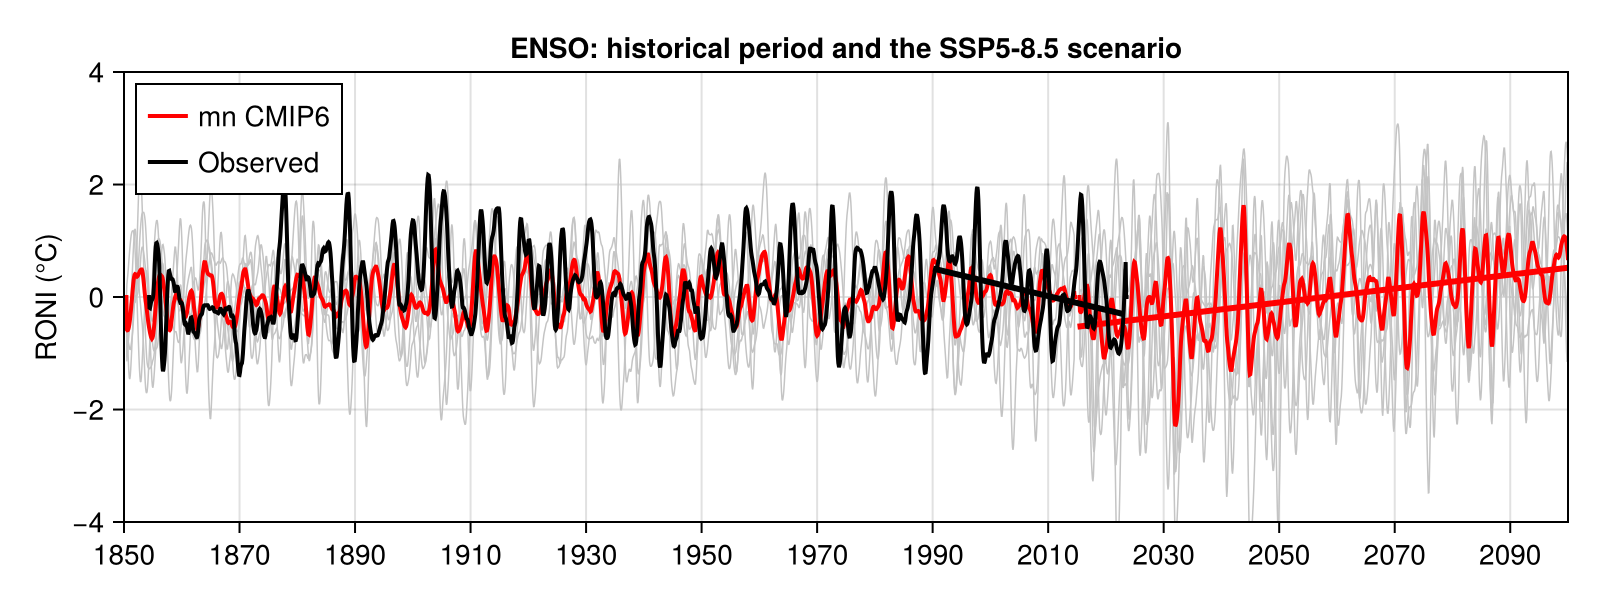

In [14]:
fig

In [15]:
save("ENSOtestHR.png", fig; px_per_unit=12.0)

In [16]:
cmipTrend

(0.0010284200761486967, -0.5278247652283391)

### redo this panel for the first round of revisions of the GRL, RI-ENSO paper... add more cmip6 models.

In [17]:
#timelen2=1032
#inpFile = file10b # FGOALS
#println("~~~~~~~~~~~~~~~~~~file 10b~~~~~~~~~~~~~~~~~~~~~~")
#println(inpFile)
#println("""~~~~~~~~~~~~~~~~~~>>>>>>~~~~~~~~~~~~~~~~~~~~~~""")
#lat1   = 71
#lat2   = 110
#lat34a = 85
#lat34b = 96
#lon34a = 10
#lon34b = 61
#prepare_cmip_ts(inpFile,timelen2,lat1,lat2,lon34a,lon34b,lat34a,lat34b);
#ba10b = ts_rmn

In [18]:
lpath="/Users/C823281551/data/cmip6/potInt/"

# these values are for a 144x73 grid
lat1 = 29;lat2 = 45;lon34a = 5;lon34b = 25;lat34a = 35;lat34b = 39

# first
file   = lpath*"MPI_ESM1_2_full_output_record.nc"
inpFile = file 
println(inpFile)
println("""~~~~~~~~~~~~~~~~~~>>>>>>~~~~~~~~~~~~~~~~~~~~~~""")
calc_roni_cmip_ts(inpFile,timelen2,lat1,lat2,lon34a,lon34b,lat34a,lat34b);
ts_1 = ts_rmn;

# second
file   = lpath*"MIROC6_full_output_record.nc"
inpFile = file 
println(inpFile)
println("""~~~~~~~~~~~~~~~~~~>>>>>>~~~~~~~~~~~~~~~~~~~~~~""")
calc_roni_cmip_ts(inpFile,timelen2,lat1,lat2,lon34a,lon34b,lat34a,lat34b);
ts_2 = ts_rmn;

# third
file   = lpath*"CESM2_full_output.nc"
inpFile = file 
println(inpFile)
println("""~~~~~~~~~~~~~~~~~~>>>>>>~~~~~~~~~~~~~~~~~~~~~~""")
calc_roni_cmip_ts(inpFile,timelen2,lat1,lat2,lon34a,lon34b,lat34a,lat34b);
ts_3 = ts_rmn;

# fourth
file   = lpath*"ACCESS_CM2_full_output_record.nc"
inpFile = file 
println(inpFile)
println("""~~~~~~~~~~~~~~~~~~>>>>>>~~~~~~~~~~~~~~~~~~~~~~""")
calc_roni_cmip_ts(inpFile,timelen2,lat1,lat2,lon34a,lon34b,lat34a,lat34b);
ts_4 = ts_rmn;

# fifth
file   = lpath*"MPI_MRI-ESM2_full_output_record.nc"
inpFile = file 
println(inpFile)
println("""~~~~~~~~~~~~~~~~~~>>>>>>~~~~~~~~~~~~~~~~~~~~~~""")
calc_roni_cmip_ts(inpFile,timelen2,lat1,lat2,lon34a,lon34b,lat34a,lat34b);
ts_5 = ts_rmn;

# sixth
file   = lpath*"GFDL-ESM4_full_output_nohalo_record.nc"
inpFile = file 
println(inpFile)
println("""~~~~~~~~~~~~~~~~~~>>>>>>~~~~~~~~~~~~~~~~~~~~~~""")
calc_roni_cmip_ts(inpFile,timelen2,lat1,lat2,lon34a,lon34b,lat34a,lat34b);
ts_6 = ts_rmn;

# seventh
file   = lpath*"MPI_IPSL-CM6A_full_output_record.nc"
inpFile = file 
println(inpFile)
println("""~~~~~~~~~~~~~~~~~~>>>>>>~~~~~~~~~~~~~~~~~~~~~~""")
calc_roni_cmip_ts(inpFile,timelen2,lat1,lat2,lon34a,lon34b,lat34a,lat34b);
ts_7 = ts_rmn;

# eight
file    = lpath*"FGOALS-f3-L_full_output.nc"
inpFile = file 
println(inpFile)
println("""~~~~~~~~~~~~~~~~~~>>>>>>~~~~~~~~~~~~~~~~~~~~~~""")
calc_roni_cmip_ts(inpFile,timelen2,lat1,lat2,lon34a,lon34b,lat34a,lat34b);
ts_8 = ts_rmn;

# nine
file    = lpath*"MPI_MIROC-ES2L_full_output.nc"
inpFile = file 
println(inpFile)
println("""~~~~~~~~~~~~~~~~~~>>>>>>~~~~~~~~~~~~~~~~~~~~~~""")
calc_roni_cmip_ts(inpFile,timelen2,lat1,lat2,lon34a,lon34b,lat34a,lat34b);
ts_9 = ts_rmn;

# ten
file    = lpath*"CanESM5_full_output_sethaloTOS.nc"
inpFile = file 
println(inpFile)
println("""~~~~~~~~~~~~~~~~~~>>>>>>~~~~~~~~~~~~~~~~~~~~~~""")
calc_roni_cmip_ts(inpFile,timelen2,lat1,lat2,lon34a,lon34b,lat34a,lat34b);
ts_10 = ts_rmn;

# eleven
file    = lpath*"MPI_CESM2-WACCM_full_output.nc"
inpFile = file 
println(inpFile)
println("""~~~~~~~~~~~~~~~~~~>>>>>>~~~~~~~~~~~~~~~~~~~~~~""")
calc_roni_cmip_ts(inpFile,timelen2,lat1,lat2,lon34a,lon34b,lat34a,lat34b);
ts_11 = ts_rmn;

# twelfth
file    = lpath*"MPI_CESM2-FV2_full_output.nc"
inpFile = file 
println(inpFile)
println("""~~~~~~~~~~~~~~~~~~>>>>>>~~~~~~~~~~~~~~~~~~~~~~""")
calc_roni_cmip_ts(inpFile,timelen2,lat1,lat2,lon34a,lon34b,lat34a,lat34b);
ts_12 = ts_rmn;

# thirteen
file   = lpath*"ECEarth3_full_output.nc"
inpFile = file 
println(inpFile)
println("""~~~~~~~~~~~~~~~~~~>>>>>>~~~~~~~~~~~~~~~~~~~~~~""")
calc_roni_cmip_ts(inpFile,timelen2,lat1,lat2,lon34a,lon34b,lat34a,lat34b);
ts_13 = ts_rmn;

# fourteen
file   = lpath*"ACCESS_ESM15_full_output.nc"
inpFile = file 
println(inpFile)
println("""~~~~~~~~~~~~~~~~~~>>>>>>~~~~~~~~~~~~~~~~~~~~~~""")
calc_roni_cmip_ts(inpFile,timelen2,lat1,lat2,lon34a,lon34b,lat34a,lat34b);
ts_14 = ts_rmn;

# fifteen 
file   = lpath*"MPI_UKESM1-0-LL_full_output.nc"
inpFile = file 
println(inpFile)
println("""~~~~~~~~~~~~~~~~~~>>>>>>~~~~~~~~~~~~~~~~~~~~~~""")
calc_roni_cmip_ts(inpFile,timelen2,lat1,lat2,lon34a,lon34b,lat34a,lat34b);
ts_15 = ts_rmn;

# sixteen
file   =  lpath*"CNRM_ESM2_full_output.nc"
inpFile = file 
println(inpFile)
println("""~~~~~~~~~~~~~~~~~~>>>>>>~~~~~~~~~~~~~~~~~~~~~~""")
calc_roni_cmip_ts(inpFile,timelen2,lat1,lat2,lon34a,lon34b,lat34a,lat34b);
ts_16 = ts_rmn;

# seventeen
file   = "/Users/C823281551/data/cmip6/HadGEM3/tos_73x144.nc"
inpFile = file
println(inpFile)
println("""~~~~~~~~~~~~~~~~~~>>>>>>~~~~~~~~~~~~~~~~~~~~~~""")
prepare_cmip_ts(inpFile,timelen2,lat1,lat2,lon34a,lon34b,lat34a,lat34b);
ts_17 = ts_rmn;

# eightteen
file   =  lpath*"NorESM2-LM_full_output_sethalom1_tos.nc"
inpFile = file 
println(inpFile)
println("""~~~~~~~~~~~~~~~~~~>>>>>>~~~~~~~~~~~~~~~~~~~~~~""")
calc_roni_cmip_ts(inpFile,timelen2,lat1,lat2,lon34a,lon34b,lat34a,lat34b);
ts_18 = ts_rmn;

# nineteen
file = "/Users/C823281551/data/cmip6/tos_Omon_GFDL-CM4_ssp585_r1i1p1f1_gn_201501-210012_73x144.nc"
inpFile = file
println(inpFile)
println("""~~~~~~~~~~~~~~~~~~>>>>>>~~~~~~~~~~~~~~~~~~~~~~""")
prepare_cmip_ts(inpFile,timelen2,lat1,lat2,lon34a,lon34b,lat34a,lat34b);
ts_19 = ts_rmn;

# twenty
file = "/Users/C823281551/data/cmip6/tos_Omon_TaiESM1_ssp585_r1i1p1f1_gn_201501-210012_73x144.nc"
inpFile = file
println(inpFile)
println("""~~~~~~~~~~~~~~~~~~>>>>>>~~~~~~~~~~~~~~~~~~~~~~""")
prepare_cmip_ts(inpFile,timelen2,lat1,lat2,lon34a,lon34b,lat34a,lat34b);
ts_20 = ts_rmn;

# SSP5-8.5 scenario
ts_total  = [ts_1';ts_2';ts_3';ts_4';ts_5';
             ts_6';ts_7';ts_8';ts_9';ts_10'; 
             ts_11';ts_12';ts_13';ts_14';ts_15';
             ts_16';ts_17';ts_18';ts_19';ts_20'];
mnSSPnew = mean(ts_total, dims = 1)

/Users/C823281551/data/cmip6/potInt/MPI_ESM1_2_full_output_record.nc
~~~~~~~~~~~~~~~~~~>>>>>>~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~ nino34 long points: ~~~~~~~~~~~~~~~~
Union{Missing, Float64}[-169.5, -167.0, -164.5, -162.0, -159.5, -157.0, -154.5, -152.0, -149.5, -147.0, -144.5, -142.0, -139.5, -137.0, -134.5, -132.0, -129.5, -127.0, -124.5, -122.0, -119.5]
~~~~~ nino34 lat points: ~~~~~~~~~~~~~~~~
Union{Missing, Float64}[-5.519999999999993, -3.049999999999993, -0.579999999999993, 1.8900000000000072, 4.360000000000007]
~~~~~tropical boundary lat points: ~~~~~~~~~~~~~~~~
Union{Missing, Float64}[-20.339999999999996, -17.869999999999994, -15.399999999999995, -12.929999999999994, -10.459999999999994, -7.989999999999993, -5.519999999999993, -3.049999999999993, -0.579999999999993, 1.8900000000000072, 4.360000000000007, 6.830000000000007, 9.300000000000008, 11.770000000000008, 14.240000000000009, 16.710000000000008, 19.180000000000007]
~~~~~~~~~~~~~~~~~~~~~~~~~~~
/Users/C82

1×1032 Matrix{Float64}:
 -0.810717  -0.86178  -0.818952  -0.725925  …  0.310569  0.315322  0.329258

In [19]:
smooth_12_ts(ts_20,timelen2)
ts_20_sm = ts_12_sm; # ssp585
smooth_12_ts(ts_19,timelen2)
ts_19_sm = ts_12_sm; # ssp585
smooth_12_ts(ts_18,timelen2)
ts_18_sm = ts_12_sm; # ssp585
smooth_12_ts(ts_17,timelen2)
ts_17_sm = ts_12_sm; # ssp585
smooth_12_ts(ts_16,timelen2)
ts_16_sm = ts_12_sm; # ssp585
smooth_12_ts(ts_15,timelen2)
ts_15_sm = ts_12_sm; # ssp585
smooth_12_ts(ts_14,timelen2)
ts_14_sm = ts_12_sm; # ssp585
smooth_12_ts(ts_13,timelen2)
ts_13_sm = ts_12_sm # ssp585
smooth_12_ts(ts_12,timelen2)
ts_12_sm = ts_12_sm # ssp585
smooth_12_ts(ts_11,timelen2)
ts_11_sm = ts_12_sm # ssp585
smooth_12_ts(ts_10,timelen2)
ts_10_sm = ts_12_sm # ssp585
smooth_12_ts(ts_9,timelen2)
ts_9_sm = ts_12_sm; # ssp585
smooth_12_ts(ts_8,timelen2)
ts_8_sm = ts_12_sm; # ssp585
smooth_12_ts(ts_7,timelen2)
ts_7_sm = ts_12_sm; # ssp585
smooth_12_ts(ts_6,timelen2)
ts_6_sm = ts_12_sm; # ssp585
smooth_12_ts(ts_5,timelen2)
ts_5_sm = ts_12_sm; # ssp585
smooth_12_ts(ts_4,timelen2)
ts_4_sm = ts_12_sm; # ssp585
smooth_12_ts(ts_3,timelen2)
ts_3_sm = ts_12_sm; # ssp585
smooth_12_ts(ts_2,timelen2)
ts_2_sm = ts_12_sm; # ssp585
smooth_12_ts(ts_1,timelen2)
ts_1_sm = ts_12_sm; # ssp585
#
ts_total_sm  = [ts_1_sm';ts_2_sm';ts_3_sm';ts_4_sm';ts_5_sm';
                ts_6_sm';ts_7_sm';ts_8_sm';ts_9_sm';ts_10_sm';
                ts_11_sm';ts_12_sm';ts_13_sm';ts_14_sm';ts_15_sm';
                ts_16_sm';ts_17_sm';ts_18_sm';ts_19_sm';ts_20_sm'];
mnSSPnew_sm = mean(ts_total_sm, dims = 1)

1×1032 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  -0.351599  …  0.0  0.0  0.0  0.0  0.0  0.0

In [20]:
#timeB = collect(0:1031.);
# best fit regression
trend1 = find_best_fit(timeB,ts_1[:]);
# project the trend to the correct timeslice using the least squares coefficients:
#ts1   = collect(timeB).*Trend1[1] .+ Trend1[2];
trend2 = find_best_fit(timeB,ts_2[:]);
trend3 = find_best_fit(timeB,ts_3[:]);
trend4 = find_best_fit(timeB,ts_4[:]);
trend5 = find_best_fit(timeB,ts_5[:]);
trend6 = find_best_fit(timeB,ts_6[:]);
trend7 = find_best_fit(timeB,ts_7[:]);
trend8 = find_best_fit(timeB,ts_8[:]);
trend9 = find_best_fit(timeB,ts_9[:]);
trend10 = find_best_fit(timeB,ts_10[:]);
trend11 = find_best_fit(timeB,ts_11[:]);
trend12 = find_best_fit(timeB,ts_12[:]);
trend13 = find_best_fit(timeB,ts_13[:]);
trend14 = find_best_fit(timeB,ts_14[:]);
trend15 = find_best_fit(timeB,ts_15[:]);
trend16 = find_best_fit(timeB,ts_16[:]);
trend17 = find_best_fit(timeB,ts_17[:]);
trend18 = find_best_fit(timeB,ts_18[:]);
trend19 = find_best_fit(timeB,ts_19[:]);
trend20 = find_best_fit(timeB,ts_20[:]);

#tottrend = trend1[1]+trend2[1]+trend3[1]+trend4[1]+trend5[1]+trend6[1]+trend7[1]+trend8[1]+trend9[1]+trend10[1]+trend11[1]+trend12[1]+trend13[1]+trend14[1]+trend15[1]
tottrend = trend1.+trend2.+trend3.+trend4.+trend5.+trend6.+trend7.+trend8.+trend9.+trend10.+trend11.+trend12.+trend13.+trend14.+trend15.+trend16.+trend17.+trend18.+trend19.+trend20

mn_trend = tottrend[1]/20
mn_int   = tottrend[2]/20
mn_ts    = collect(timeB) .* mn_trend .+ mn_int

1032-element Vector{Float64}:
 -0.495663203054938
 -0.4947017683609792
 -0.49374033366702036
 -0.49277889897306154
 -0.49181746427910267
 -0.49085602958514385
 -0.48989459489118503
 -0.4889331601972262
 -0.4879717255032674
 -0.4870102908093086
 -0.4860488561153497
 -0.4850874214213909
 -0.48412598672743207
  ⋮
  0.48500018478306556
  0.4859616194770244
  0.4869230541709832
  0.487884488864942
  0.48884592355890083
  0.48980735825285965
  0.49076879294681847
  0.4917302276407773
  0.4926916623347361
  0.4936530970286949
  0.49461453172265374
  0.49557596641661267

In [21]:
mn_int

-0.495663203054938

In [50]:
fig = Figure(;
    size = (800,300),
    )
ax = Axis(fig[1,1];
    xlabel=" ",
    ylabel="RONI (°C)",
    xticks=([1850,1870,1890,1910,1930,1950,1970,1990,2010,2030,2050,2070,2090]),
    title="ENSO: historical period and the SSP5-8.5 scenario"
    )
lines!(ax, B,ba1_sm[:],
    linewidth = 0.75,
    color = "grey77"
    #color = "paleturquoise1"
    #label = "CNRM: RONI"
    )
limits!(1850, 2100, -4, 4)
lines!(ax, B,ba2_sm[:],
    linewidth = 0.75,
    color = "grey77"
    #color = "aquamarine"
    #label = "MPI: RONI"
    )
lines!(ax, B,ba3_sm[:],
    linewidth = 0.75,
    color = "grey77"
    #color = "lightcyan"
    #label = "GFDL: RONI"
    )
lines!(ax, B,ba4_sm[:],
    linewidth = 0.75,
    color = "grey77"
    #color = "paleturquoise"
    #label = "E3SM: RONI"
    )
lines!(ax, B,ba6_sm[:],
    linewidth = 0.75,
    color = "grey77"
    #color = "thistle2"
    #label = "HadGEM3: RONI"
    )
#-----------------------
lines!(ax, C,ts_1_sm,
    color = "grey77",
    linewidth = 1.0
    )
lines!(ax, C,ts_2_sm,
    color = "grey77",
    linewidth = 1.0
    )
lines!(ax, C,ts_3_sm,
    color = "grey77",
    linewidth = 1.0
    )
lines!(ax, C,ts_4_sm,
    color = "grey77",
    linewidth = 1.0
    )
lines!(ax, C,ts_5_sm,
    color = "grey77",
    linewidth = 1.0
    )
lines!(ax, C,ts_6_sm,
    color = "grey77",
    linewidth = 1.0
    )
lines!(ax, C,ts_7_sm,
    color = "grey77",
    linewidth = 1.0
    )
lines!(ax, C,ts_8_sm,
    color = "grey77",
    linewidth = 1.0
    )
lines!(ax, C,ts_9_sm,
    color = "grey77",
    linewidth = 1.0
    )
lines!(ax, C,ts_10_sm,
    color = "grey77",
    linewidth = 1.0
    )
lines!(ax, C,ts_11_sm,
    color = "grey77",
    linewidth = 1.0
    )
lines!(ax, C,ts_12_sm,
    color = "grey77",
    linewidth = 1.0
    )
lines!(ax, C,ts_13_sm,
    color = "grey77",
    linewidth = 1.0
    )
lines!(ax, C,ts_14_sm,
    color = "grey77",
    linewidth = 1.0
    )
lines!(ax, C,ts_15_sm,
    color = "grey77",
    linewidth = 1.0
    )
lines!(ax, C,ts_16_sm,
    color = "grey77",
    linewidth = 1.0
    )
lines!(ax, C,ts_17_sm,
    color = "grey77",
    linewidth = 1.0
    )
lines!(ax, C,ts_18_sm,
    color = "grey77",
    linewidth = 1.0
    )
lines!(ax, C,ts_19_sm,
    color = "grey77",
    linewidth = 1.0
    )
lines!(ax, C,ts_20_sm,
    color = "grey77",
    linewidth = 1.0
    )
#-----------------------
#lines!(ax, C,ts_10,
#    color = "grey77",
#    linewidth = 1.0,
#    )
#lines!(ax, C,ts_11,
#    color = "grey77",
#    linewidth = 1.0,
#    )
lines!(ax, B,mnH[:],
    linewidth = 2.0,
    color = "red",
    label = "mn CMIP6"
    )
#lines!(ax, B,hTrend)
#lines!(ax, C,mnSSP[:],
#    linewidth = 2.0,
#    color = "red"
#    #label = "mn SSP"
#    )
#lines!(ax, C,cmTrend,
#    color = "red",
#    linewidth = 3.0,
#    )
lines!(ax, A,blah3[:], # this is the observed roni, smoothed with a 12 point filter
#lines!(ax, A,roni_a[:], 
    linewidth = 2.,
    color = "black",
    #color = "lightblue1",
    label = "Observed"
    )
lines!(ax, D,hTrend,
    linewidth = 3.0,
    #color = "lightblue1"
    color = "black"
    )
lines!(ax, C,mn_ts, # this is the trend line
    color = "red",
    linewidth = 3.0,
    )
#lines!(ax, C,mnSSPnew_sm[:],
#    color = "red",
#    linewidth = 2.,
#    )
#
axislegend( position=:lt)

Legend()

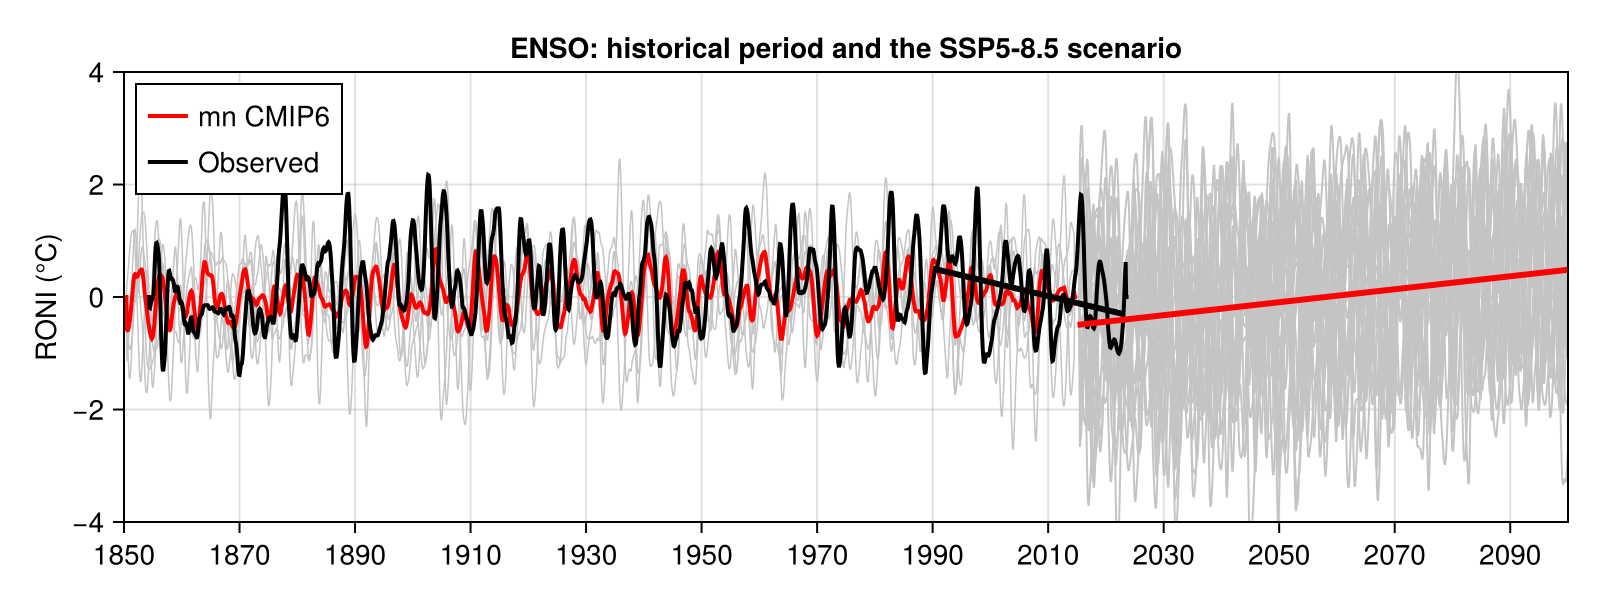

In [51]:
fig

In [52]:
save("roni_20mods_new.png", fig, px_per_unit=6.0)

In [25]:
ensoDef = 1.0
blah = test_num_enso(ts_4_sm[1:516],ensoDef)

10

In [26]:
numPosA=zeros(20); numPosB=zeros(20);
numNegA=zeros(20); numNegB=zeros(20);

In [27]:
numPosA[1]=test_num_enso(ts_1_sm[1:516],ensoDef)
numPosA[2]=test_num_enso(ts_2_sm[1:516],ensoDef)
numPosA[3]=test_num_enso(ts_3_sm[1:516],ensoDef)
numPosA[4]=test_num_enso(ts_4_sm[1:516],ensoDef)
numPosA[5]=test_num_enso(ts_5_sm[1:516],ensoDef)
numPosA[6]=test_num_enso(ts_6_sm[1:516],ensoDef)
numPosA[7]=test_num_enso(ts_7_sm[1:516],ensoDef)
numPosA[8]=test_num_enso(ts_8_sm[1:516],ensoDef)
numPosA[9]=test_num_enso(ts_9_sm[1:516],ensoDef)
numPosA[10]=test_num_enso(ts_10_sm[1:516],ensoDef)
numPosA[11]=test_num_enso(ts_11_sm[1:516],ensoDef)
numPosA[12]=test_num_enso(ts_12_sm[1:516],ensoDef)
numPosA[13]=test_num_enso(ts_13_sm[1:516],ensoDef)
numPosA[14]=test_num_enso(ts_14_sm[1:516],ensoDef)
numPosA[15]=test_num_enso(ts_15_sm[1:516],ensoDef)
numPosA[16]=test_num_enso(ts_16_sm[1:516],ensoDef)
numPosA[17]=test_num_enso(ts_17_sm[1:516],ensoDef)
numPosA[18]=test_num_enso(ts_18_sm[1:516],ensoDef)
numPosA[19]=test_num_enso(ts_19_sm[1:516],ensoDef)
numPosA[20]=test_num_enso(ts_20_sm[1:516],ensoDef)

6

In [28]:
numPosA

20-element Vector{Float64}:
  5.0
  8.0
 11.0
 10.0
  7.0
  8.0
  6.0
 12.0
 10.0
  5.0
  8.0
  5.0
  7.0
  3.0
  8.0
  9.0
  8.0
  9.0
  9.0
  6.0

In [29]:
indC=517; indD=1032;
indA=1; indB=516;

In [30]:
numPosB[1]=test_num_enso(ts_1_sm[indC:indD],ensoDef)
numPosB[2]=test_num_enso(ts_2_sm[indC:indD],ensoDef)
numPosB[3]=test_num_enso(ts_3_sm[indC:indD],ensoDef)
numPosB[4]=test_num_enso(ts_4_sm[indC:indD],ensoDef)
numPosB[5]=test_num_enso(ts_5_sm[indC:indD],ensoDef)
numPosB[6]=test_num_enso(ts_6_sm[indC:indD],ensoDef)
numPosB[7]=test_num_enso(ts_7_sm[indC:indD],ensoDef)
numPosB[8]=test_num_enso(ts_8_sm[indC:indD],ensoDef)
numPosB[9]=test_num_enso(ts_9_sm[indC:indD],ensoDef)
numPosB[10]=test_num_enso(ts_10_sm[indC:indD],ensoDef)
numPosB[11]=test_num_enso(ts_11_sm[indC:indD],ensoDef)
numPosB[12]=test_num_enso(ts_12_sm[indC:indD],ensoDef)
numPosB[13]=test_num_enso(ts_13_sm[indC:indD],ensoDef)
numPosB[14]=test_num_enso(ts_14_sm[indC:indD],ensoDef)
numPosB[15]=test_num_enso(ts_15_sm[indC:indD],ensoDef)
numPosB[16]=test_num_enso(ts_16_sm[indC:indD],ensoDef)
numPosB[17]=test_num_enso(ts_17_sm[indC:indD],ensoDef)
numPosB[18]=test_num_enso(ts_18_sm[indC:indD],ensoDef)
numPosB[19]=test_num_enso(ts_19_sm[indC:indD],ensoDef)
numPosB[20]=test_num_enso(ts_20_sm[indC:indD],ensoDef)
#
numNegB[1]=test_num_nina(ts_1_sm[indC:indD],-ensoDef)
numNegB[2]=test_num_nina(ts_2_sm[indC:indD],-ensoDef)
numNegB[3]=test_num_nina(ts_3_sm[indC:indD],-ensoDef)
numNegB[4]=test_num_nina(ts_4_sm[indC:indD],-ensoDef)
numNegB[5]=test_num_nina(ts_5_sm[indC:indD],-ensoDef)
numNegB[6]=test_num_nina(ts_6_sm[indC:indD],-ensoDef)
numNegB[7]=test_num_nina(ts_7_sm[indC:indD],-ensoDef)
numNegB[8]=test_num_nina(ts_8_sm[indC:indD],-ensoDef)
numNegB[9]=test_num_nina(ts_9_sm[indC:indD],-ensoDef)
numNegB[10]=test_num_nina(ts_10_sm[indC:indD],-ensoDef)
numNegB[11]=test_num_nina(ts_11_sm[indC:indD],-ensoDef)
numNegB[12]=test_num_nina(ts_12_sm[indC:indD],-ensoDef)
numNegB[13]=test_num_nina(ts_13_sm[indC:indD],-ensoDef)
numNegB[14]=test_num_nina(ts_14_sm[indC:indD],-ensoDef)
numNegB[15]=test_num_nina(ts_15_sm[indC:indD],-ensoDef)
numNegB[16]=test_num_nina(ts_16_sm[indC:indD],-ensoDef)
numNegB[17]=test_num_nina(ts_17_sm[indC:indD],-ensoDef)
numNegB[18]=test_num_nina(ts_18_sm[indC:indD],-ensoDef)
numNegB[19]=test_num_nina(ts_19_sm[indC:indD],-ensoDef)
numNegB[20]=test_num_nina(ts_20_sm[indC:indD],-ensoDef)
#
numNegA[1]=test_num_nina(ts_1_sm[indA:indB],-ensoDef)
numNegA[2]=test_num_nina(ts_2_sm[indA:indB],-ensoDef)
numNegA[3]=test_num_nina(ts_3_sm[indA:indB],-ensoDef)
numNegA[4]=test_num_nina(ts_4_sm[indA:indB],-ensoDef)
numNegA[5]=test_num_nina(ts_5_sm[indA:indB],-ensoDef)
numNegA[6]=test_num_nina(ts_6_sm[indA:indB],-ensoDef)
numNegA[7]=test_num_nina(ts_7_sm[indA:indB],-ensoDef)
numNegA[8]=test_num_nina(ts_8_sm[indA:indB],-ensoDef)
numNegA[9]=test_num_nina(ts_9_sm[indA:indB],-ensoDef)
numNegA[10]=test_num_nina(ts_10_sm[indA:indB],-ensoDef)
numNegA[11]=test_num_nina(ts_11_sm[indA:indB],-ensoDef)
numNegA[12]=test_num_nina(ts_12_sm[indA:indB],-ensoDef)
numNegA[13]=test_num_nina(ts_13_sm[indA:indB],-ensoDef)
numNegA[14]=test_num_nina(ts_14_sm[indA:indB],-ensoDef)
numNegA[15]=test_num_nina(ts_15_sm[indA:indB],-ensoDef)
numNegA[16]=test_num_nina(ts_16_sm[indA:indB],-ensoDef)
numNegA[17]=test_num_nina(ts_17_sm[indA:indB],-ensoDef)
numNegA[18]=test_num_nina(ts_18_sm[indA:indB],-ensoDef)
numNegA[19]=test_num_nina(ts_19_sm[indA:indB],-ensoDef)
numNegA[20]=test_num_nina(ts_20_sm[indA:indB],-ensoDef)

9

In [31]:
numPosB .- numPosA

20-element Vector{Float64}:
 2.0
 1.0
 4.0
 7.0
 6.0
 6.0
 4.0
 2.0
 0.0
 5.0
 8.0
 2.0
 4.0
 9.0
 3.0
 4.0
 5.0
 2.0
 3.0
 5.0

In [32]:
numsA = range(5., 15., length = 20)
numsB = range(25., 35., length = 20)

25.0:0.5263157894736842:35.0

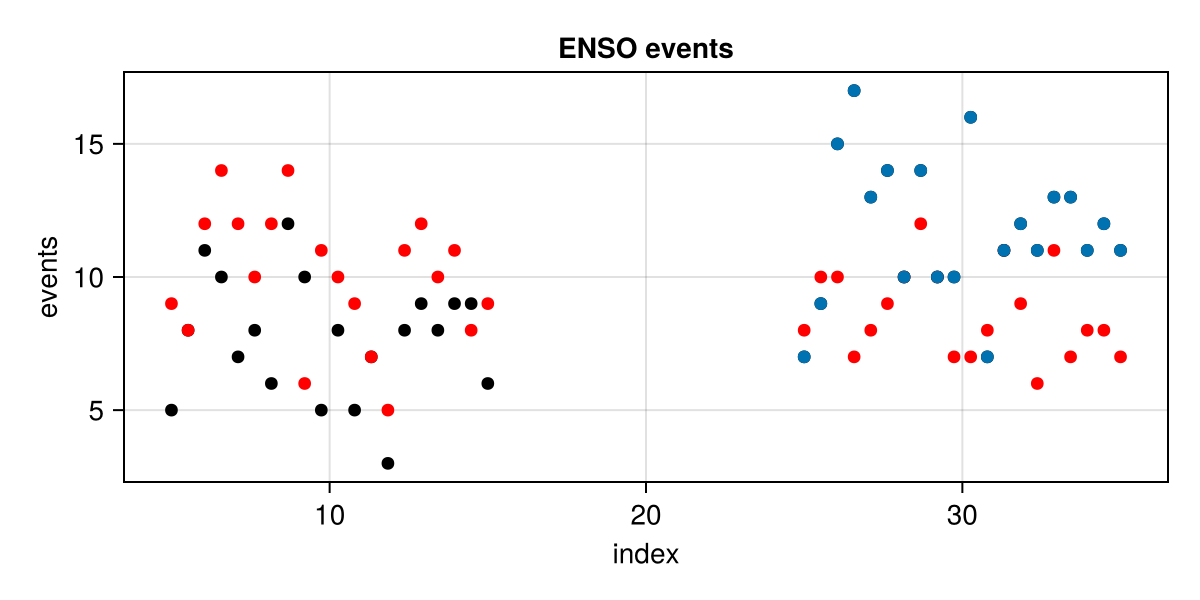

In [33]:
fig = Figure(; size = (600,300))
ax = Axis(fig[1,1];
    xlabel="index",
    ylabel="events",
    title="ENSO events"
    )
#plot!(ax,sst_var[10,110,:])
plot!(numsA,numPosA,color=:black)
plot!(numsA,numNegA,color=:red)
plot!(numsB,numNegB,color=:red)
plot!(numsB,numPosB,color=:black)
scatter!(numsB,numPosB,colormap=:vanimo)
fig

In [34]:
bb=ones(20);

In [35]:
numPosA[:]

20-element Vector{Float64}:
  5.0
  8.0
 11.0
 10.0
  7.0
  8.0
  6.0
 12.0
 10.0
  5.0
  8.0
  5.0
  7.0
  3.0
  8.0
  9.0
  8.0
  9.0
  9.0
  6.0